 # GLOBAL HAPPINESS REPORT ANALYSIS (2023)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [51]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness 2023 GDG\WHR_2023.csv")

In [52]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [54]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898
std,1.139929,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000
50%,5.684000,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000
75%,6.334000,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


## Data Cleaning


### To handle missing values

In [55]:
df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [56]:
df.healthy_life_expectancy=df.healthy_life_expectancy.fillna(df.healthy_life_expectancy.mean())

In [57]:
#confirm that the missing value is truly gone
df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [58]:
df.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [59]:
missing = df.isnull().sum().sort_values(ascending = False)
missing

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

## Exploratory Data Analysis (EDA)

In [60]:
df.head(10)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
5,Sweden,Western Europe,7.395,1.921,1.510,0.562,0.754,0.225,0.520
6,Norway,Western Europe,7.315,1.994,1.521,0.544,0.752,0.212,0.463
7,Switzerland,Western Europe,7.240,2.022,1.463,0.582,0.678,0.151,0.475
8,Luxembourg,Western Europe,7.228,2.200,1.357,0.549,0.710,0.149,0.418
9,New Zealand,North America and ANZ,7.123,1.842,1.544,0.513,0.672,0.230,0.471


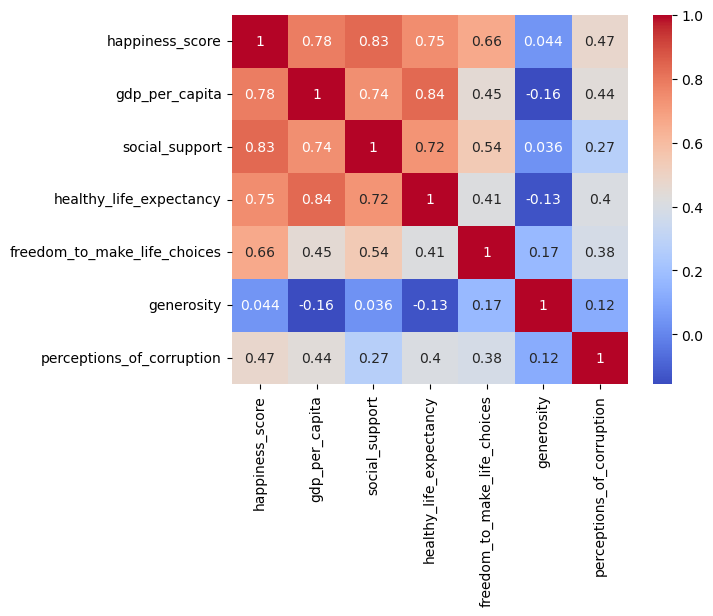

In [61]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm")
plt.show()

From the heat map above we can see the correlation of the different features. Four are highly correlated:
1. Happiness score
2. GDP per capital 
3. Social Support, and
4. Healty Life Expectancy
   
meaning that as one increases the other does to, which makes sense: the higher GDP most likely the higher the happiness score. If people live longer in the country there tends to be more happiness

freedom to make life choices is correlated too but not as the prefious four

none are negatively corelated to happiness score, so as all this features increase, the happiness score does too

### Distribution of happiness score over the years

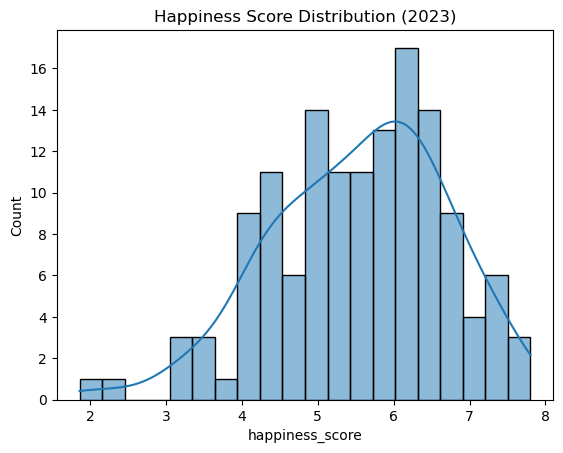

In [62]:
sns.histplot(df["happiness_score"], bins=20, kde=True)
plt.title("Happiness Score Distribution (2023)")
plt.show()

**Happiness score over the years every year recorded was always between 4 and 7 on average**

In [63]:
#First lets get how many countries are in the data set
df["country"].nunique()

137

### To get the top 10 over the years

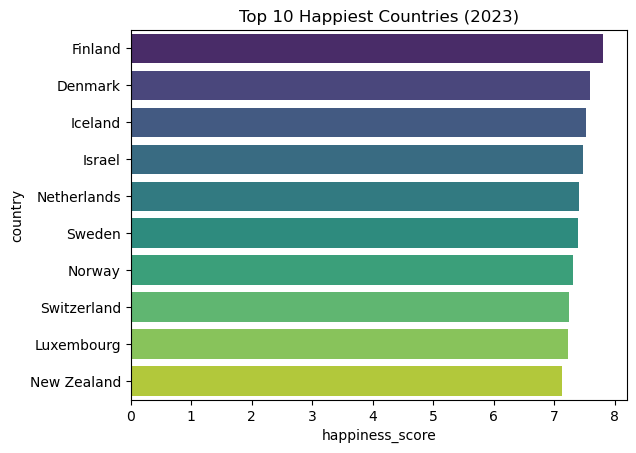

In [64]:
top10 = df.sort_values(by="happiness_score", ascending=False).head(10)
sns.barplot(data=top10, x="happiness_score", y="country", palette="viridis")
plt.title("Top 10 Happiest Countries (2023)")
plt.show()

**Most happiest countries are in europe, and north america** 

### To compare and contrast, lets get the lowest 10 most happy country over the years

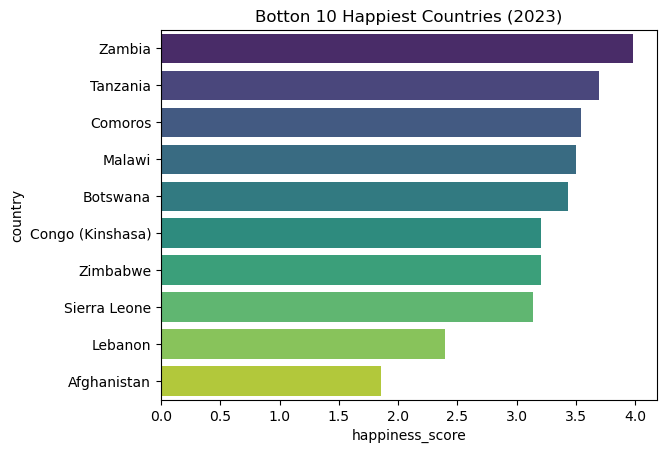

In [65]:
bottom10 = df.sort_values(by="happiness_score", ascending=False).tail(10)
sns.barplot(data=bottom10, x="happiness_score", y="country", palette="viridis")
plt.title("Botton 10 Happiest Countries (2023)")
plt.show()


From this we can see that the least happy countries are the ones in Africa

## How does Happiness vary in different region

In [66]:
#Start by showing the number of regions in the dataset
df["region"].nunique()

10

In [67]:
df["region"].value_counts()

region
Sub-Saharan Africa                    33
Central and Eastern Europe            22
Western Europe                        20
Latin America and Caribbean           19
Middle East and North Africa          14
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Commonwealth of Independent States     4
Name: count, dtype: int64

In [68]:
happiness_score_by_region=df.groupby("region")["happiness_score"].mean().sort_values(ascending=False)
happiness_score_by_region=pd.DataFrame(happiness_score_by_region)
happiness_score_by_region

,happiness_score
region,
North America and ANZ,7.018250
Western Europe,6.894350
Central and Eastern Europe,5.967091
Latin America and Caribbean,5.966053
East Asia,5.930167
Commonwealth of Independent States,5.828250
Southeast Asia,5.431222
Middle East and North Africa,5.102143
Sub-Saharan Africa,4.382485


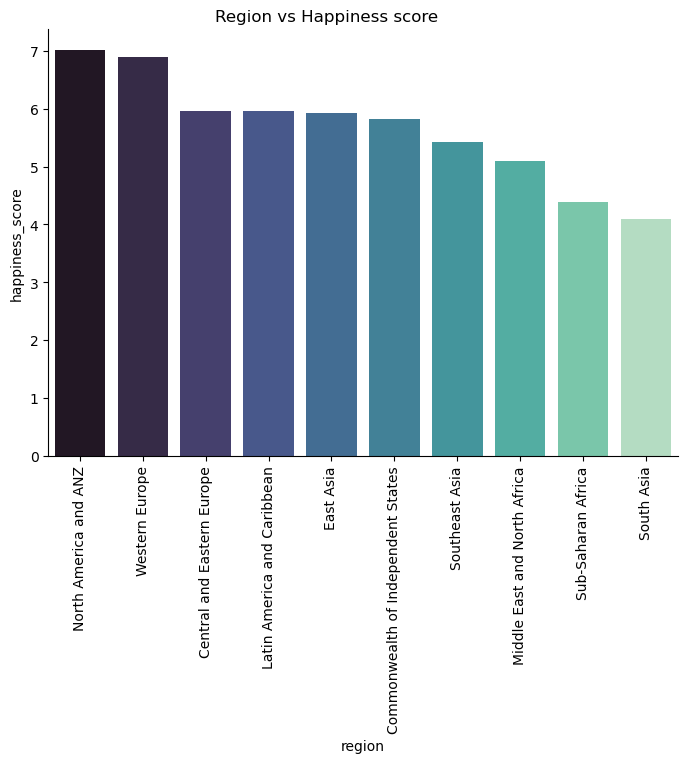

In [69]:
g=sns.catplot(x="region",y="happiness_score",data=happiness_score_by_region,palette="mako",kind="bar",legend=False)
g.fig.suptitle("Region vs Happiness score",y=1.01)
g.figure.set_size_inches(8,5)
plt.xticks(rotation=90)
plt.show()

**AS OBSERVED BEFORE, THE 2 MOST HAPPY COUNTRIES ARE IN NORTH AMERICA AND WESTERN EUROPE**

### Which Regions have highest of some determining faactors and how does it affect

In [70]:
#GDP in each region
GDP_by_regions=df.groupby("region")["gdp_per_capita"].mean().sort_values(ascending=False)
GDP_by_regions=pd.DataFrame(GDP_by_regions)
GDP_by_regions

,gdp_per_capita
region,
Western Europe,1.911050
North America and ANZ,1.900500
East Asia,1.734667
Central and Eastern Europe,1.618364
Middle East and North Africa,1.514571
Southeast Asia,1.400889
Latin America and Caribbean,1.349632
Commonwealth of Independent States,1.231000
South Asia,1.069833


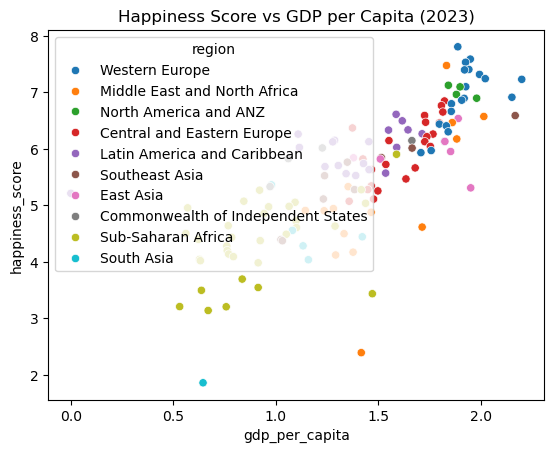

In [71]:
# Happiness Score vs GDP per capita
sns.scatterplot(data=df, x="gdp_per_capita", y="happiness_score", hue="region")
plt.title("Happiness Score vs GDP per Capita (2023)")
plt.show()

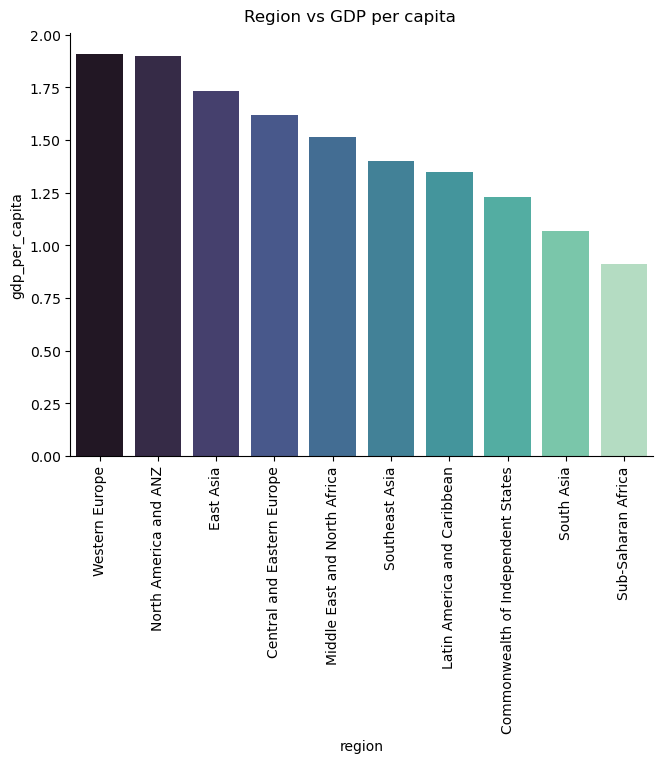

In [72]:
#compare gdp and region
#which regions are the richest and how does it affect happiness
g=sns.catplot(x="region",y="gdp_per_capita",data=GDP_by_regions,palette="mako",kind="bar",legend=False)
g.fig.suptitle("Region vs GDP per capita",y=1.01)
g.figure.set_size_inches(8,5)
plt.xticks(rotation=90)
plt.show()


**COMPARING THE REGION VS HAPPINESS SCORE WESTERN REGIONS, DEELOPED AND RICH ARE THE HAPIEST** 

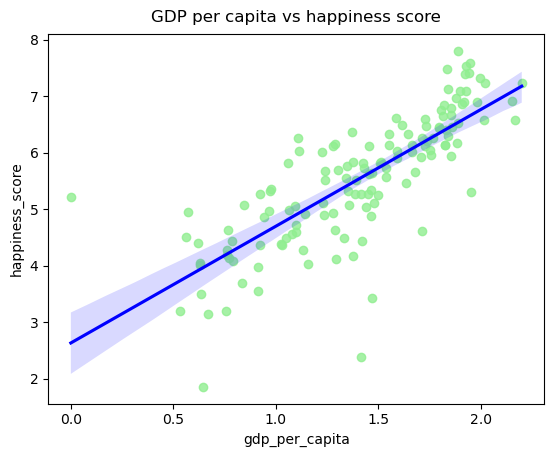

In [73]:
#visualize how it affects hapiness score
g=sns.regplot(x="gdp_per_capita",y="happiness_score",data=df,scatter_kws={"color":"lightgreen"},line_kws={"color":"blue"})
g.set_title("GDP per capita vs happiness score",y=1.01)
plt.show()

**THIS PLOT SHOWS IT MORE CLEARLY, THERE IS A LINEAR CORRELATION BETWEEN GDP AND HAPINESS**

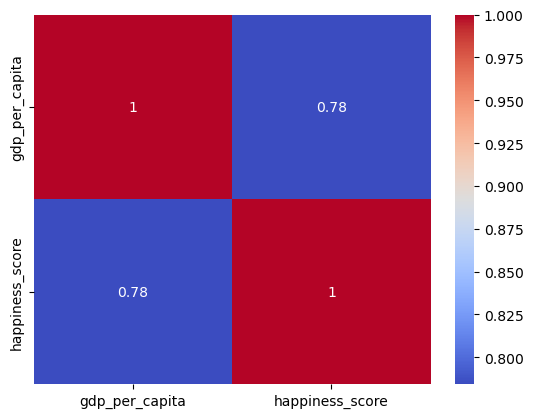

In [74]:
#How high is their linear correlation
sns.heatmap(df[["gdp_per_capita","happiness_score"]].corr(),annot=True, cmap="coolwarm")
plt.show()

In [75]:
#lets try for freedom
freedom_by_regions=df.groupby("region")["freedom_to_make_life_choices"].mean().sort_values(ascending=False)
freedom_by_regions=pd.DataFrame(freedom_by_regions)
freedom_by_regions

,freedom_to_make_life_choices
region,
Commonwealth of Independent States,0.675500
Southeast Asia,0.667111
North America and ANZ,0.640500
Western Europe,0.627500
Latin America and Caribbean,0.605895
Central and Eastern Europe,0.566227
East Asia,0.510333
South Asia,0.486500
Middle East and North Africa,0.433929


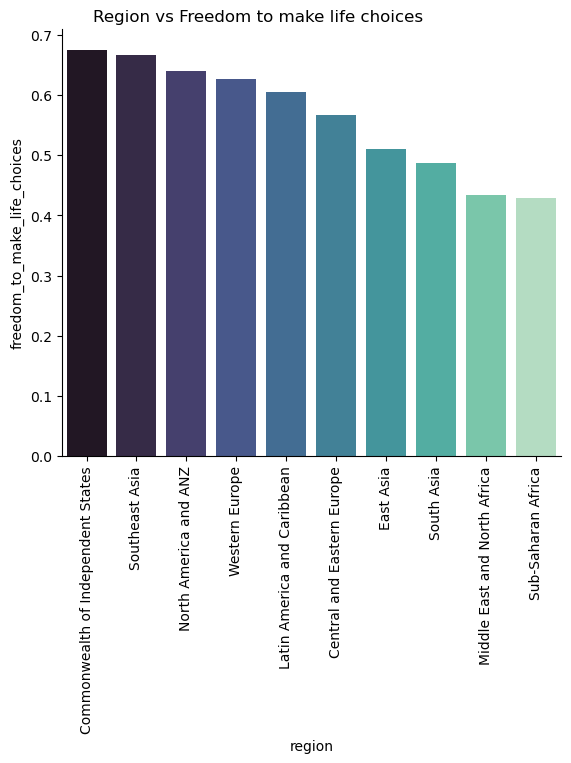

In [76]:
g=sns.catplot(x="region",y="freedom_to_make_life_choices",data=freedom_by_regions,palette="mako",kind="bar",legend=False)
g.fig.suptitle("Region vs Freedom to make life choices",y=1.01)
g.figure.set_size_inches(8,5)
plt.xticks(rotation=90)
plt.show()

**FREEDOM TO MAKE LIFE CHOICES IS CORELATED BUT ITS LESSER THAN GDP**

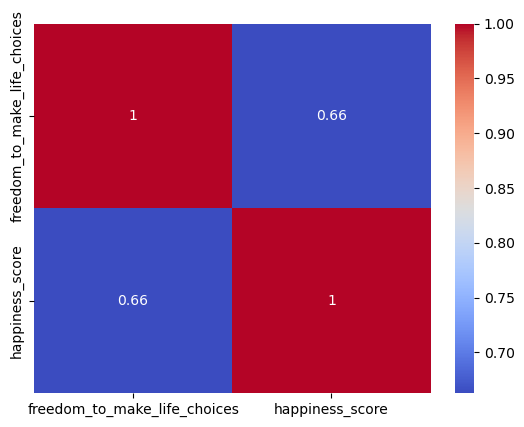

In [77]:
sns.heatmap(df[["freedom_to_make_life_choices","happiness_score"]].corr(),annot=True, cmap="coolwarm")
plt.show()

THE INSIGHT ABOVE IS MORE CLEARLY SHOWN HERE

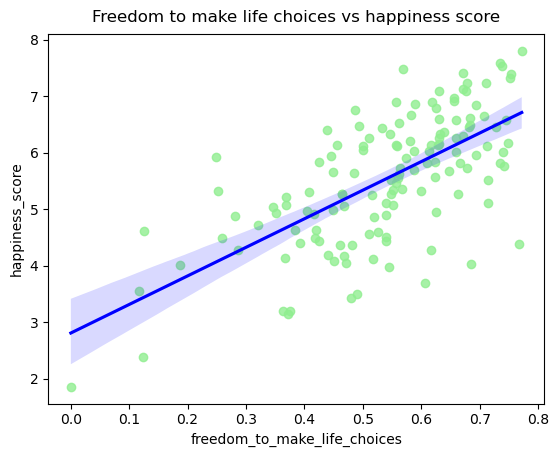

In [78]:
g=sns.regplot(x="freedom_to_make_life_choices",y="happiness_score",data=df,scatter_kws={"color":"lightgreen"},line_kws={"color":"blue"})
g.set_title("Freedom to make life choices vs happiness score",y=1.01)
plt.show()

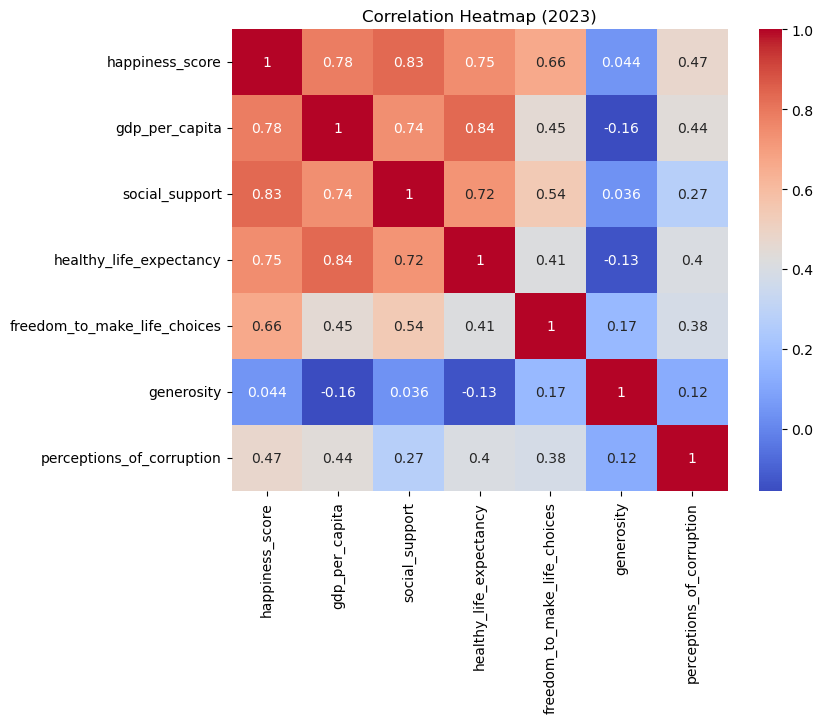

In [79]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[["happiness_score","gdp_per_capita","social_support","healthy_life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (2023)")
plt.show()

In [80]:
df.to_csv('cleaned_data.csv', index=False)
print('Saved cleaned_data.csv')

Saved cleaned_data.csv


In [84]:
df['region'].nunique()

10